# nowy parser
mam nadzieję że automagiczny
Uwaga - dla pomiarów w skali logarytmicznej dla analizatora Bodego trzeba zmienić kolumnę!

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

class osci:
    def __init__(self,time, ch1, ch2):
        self.time = time
        self.ch1 = ch1
        self.ch2 = ch2
class bode:
    def __init__(self,freq,gain,phase,label,color,marker="none",f=None, q=None):
        self.freq = freq
        self.gain = gain
        self.phase = phase
        self.label = label
        self.color = color
        self.marker = marker
        self.f = f
        self.q = q
def makeOscPlot(oscil,label="us"):
    fig, axes = plt.subplots(1,1)
    offset =  oscil.time.min()
    t1_copy = oscil.time.copy() - offset
    
    axes.plot(t1_copy,oscil.ch1,"#00ff00",label="ch1 (source)")
    axes.plot(t1_copy,oscil.ch2,"#0000ff",label="ch2 (response)")
    axes.set_xlabel("t ("+label+")")
    axes.set_ylabel("U (V)")
    axes.grid(True)
    axes.grid(True)
    axes.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

def makePhasePlot(plots, labelY="I (A)"):
  #  freq = processFile(filename, start_line,end_line, col=0)
  #  gain = processFile(filename, start_line,end_line, col=1)
  #  phase = processFile(filename, start_line,end_line, col=3,dbg=False)
    fig, axes = plt.subplots(len(plots),1)
    fig.set_size_inches(8,8)
    for bode in plots:
        axes[0].plot(bode.freq,bode.gain,bode.color,label=bode.label, marker = bode.marker)
        axes[1].plot(bode.freq,bode.phase,bode.color,label=bode.label, marker = bode.marker)
        if bode.f!= None:
            axes[0].axvline(bode.f,color=bode.color)
            axes[1].axvline(bode.f,color=bode.color)
        if bode.q!=None:
            fx = bode.f
            dfx = fx/bode.q
            axes[0].axvline(fx+dfx,linestyle="dotted",color=bode.color)
            axes[0].axvline(fx-dfx,linestyle="dotted",color=bode.color)
            axes[1].axvline(fx+dfx,linestyle="dotted",color=bode.color)
            axes[1].axvline(fx-dfx,linestyle="dotted",color=bode.color)
        
    axes[0].legend(loc="lower right")
    axes[1].legend(loc="lower right")
        
    axes[0].set_ylabel(labelY)
    axes[1].set_ylabel("phase (deg)")
    for ax in axes:
        ax.grid(True)
       # ax.set_xscale("log")
        ax.set_xlabel("freq (Hz)")
        ax.legend(loc="upper right")

        
    plt.tight_layout()
    plt.show()
    
def printArray(name,array):
    line = name
    line +=str("=np.array([")
    size = array.size
    for i in range(0, size-1):
        line +=str(str(array[i])+",")
    line += str(str(array[size-1])+"])")
    print(line)
    
def processFile(arrname, filename, col=0):
    lineNo = 0
    res = []
    startLine = -1
    endLine = 0
    #counting lines
    with open(filename) as infile:
        for line in infile:
            char = str(line[0])
            if char.isnumeric() and startLine == -1:
                startLine = lineNo
            if not char.isnumeric():
                startLine = -1
            lineNo+=1
    endLine = lineNo
    nLines = endLine-startLine
    step = 1
    if nLines > 150:
        step = int(nLines/250)
    #processing data
    lineNo = 0
    with open(filename) as infile:
        for line in infile:
            if(lineNo>=startLine and lineNo<endLine): #numeric values
                if lineNo%step ==0: #process
                    array = line.split()
                    value = array[col]
                    if ":" in value:
                        value = value.split(',')
                        res.append(int(value[1]))
                    else:
                        array[col] = array[col].replace(',',".")
                        res.append(float(array[col]))
            lineNo+=1
  #  print(res)
    nparr = np.array(res)
    return printArray(arrname, np.array(res))

def processOsci(fivlinelename):
    processFile("time",filename,1)
    processFile("ch1",filename,2)
    processFile("ch2",filename,5)
def processBode(filename):
    processFile("freq",filename,0)
    processFile("gain",filename,1)
  #  processFile("phase",filename,2)
def processBode2(filename):
   # processFile("freq",filename,0)
    processFile("gain",filename,1)   # jeśli wywali index error może trzeba zmienić numer koluny   
   
        

    
processBode2("data/bode_cor_33.txt")


gain=np.array([0.024,0.025,0.026,0.026,0.027,0.028,0.029,0.03,0.031,0.032,0.033,0.034,0.035,0.037,0.038,0.04,0.041,0.043,0.045,0.048,0.05,0.053,0.056,0.059,0.063,0.067,0.072,0.078,0.085,0.092,0.102,0.113,0.127,0.145,0.168,0.199,0.242,0.301,0.376,0.443,0.439,0.369,0.295,0.237,0.196,0.166,0.143,0.126,0.112,0.101,0.092,0.084,0.077,0.072,0.067,0.063,0.059,0.056,0.053,0.05,0.047,0.045,0.043,0.041,0.04,0.038,0.037,0.035,0.034,0.033,0.032,0.031,0.03,0.029,0.028,0.027,0.026,0.025])


In [39]:
[7000.0, 7081.056, 7163.051, 7245.995, 7329.9, 7414.776, 7500.635, 7587.488, 7675.347, 7764.224, 7854.129, 7945.076, 8037.075, 8130.14, 8224.283, 8319.516, 8415.851, 8513.302, 8611.881, 8711.602, 8812.478, 8914.522, 9017.747, 9122.167, 9227.797, 9334.65, 9442.74, 9552.082, 9662.69, 9774.579, 9887.763, 10002.258, 10118.078, 10235.24, 10353.759, 10473.65, 10594.929, 10717.612, 10841.716, 10967.257, 11094.252, 11222.718, 11352.671, 11484.128, 11617.108, 11751.628, 11887.706, 12025.359, 12164.606, 12305.465, 12447.956, 12592.096, 12737.906, 12885.404, 13034.61, 13185.544, 13338.225, 13492.674, 13648.912, 13806.959, 13966.836, 14128.565, 14292.166, 14457.661, 14625.073, 14794.423, 14965.735, 15139.03, 15314.331, 15491.663, 15671.048, 15852.51, 16036.074, 16221.763, 16409.602, 16599.616, 16791.83, 16986.271]
freq=np.array([7000.0,7081.056,7163.051,7245.995,7329.9,7414.776,7500.635,7587.488,7675.347,7764.224,7854.129,7945.076,8037.075,8130.14,8224.283,8319.516,8415.851,8513.302,8611.881,8711.602,8812.478,8914.522,9017.747,9122.167,9227.797,9334.65,9442.74,9552.082,9662.69,9774.579,9887.763,10002.258,10118.078,10235.24,10353.759,10473.65,10594.929,10717.612,10841.716,10967.257,11094.252,11222.718,11352.671,11484.128,11617.108,11751.628,11887.706,12025.359,12164.606,12305.465,12447.956,12592.096,12737.906,12885.404,13034.61,13185.544,13338.225,13492.674,13648.912,13806.959,13966.836,14128.565,14292.166,14457.661,14625.073,14794.423,14965.735,15139.03,15314.331,15491.663,15671.048,15852.51,16036.074,16221.763,16409.602,16599.616,16791.83,16986.271])
[0.024, 0.025, 0.025, 0.026, 0.027, 0.028, 0.028, 0.029, 0.03, 0.031, 0.032, 0.034, 0.035, 0.036, 0.038, 0.039, 0.041, 0.043, 0.045, 0.047, 0.049, 0.052, 0.054, 0.058, 0.061, 0.065, 0.07, 0.075, 0.081, 0.088, 0.097, 0.107, 0.12, 0.135, 0.155, 0.181, 0.217, 0.266, 0.333, 0.41, 0.452, 0.413, 0.336, 0.269, 0.219, 0.183, 0.156, 0.136, 0.12, 0.107, 0.097, 0.089, 0.081, 0.075, 0.07, 0.065, 0.061, 0.058, 0.055, 0.052, 0.049, 0.047, 0.045, 0.043, 0.041, 0.039, 0.038, 0.036, 0.035, 0.034, 0.032, 0.031, 0.03, 0.029, 0.029, 0.028, 0.027, 0.026]
gain=np.array([0.024,0.025,0.025,0.026,0.027,0.028,0.028,0.029,0.03,0.031,0.032,0.034,0.035,0.036,0.038,0.039,0.041,0.043,0.045,0.047,0.049,0.052,0.054,0.058,0.061,0.065,0.07,0.075,0.081,0.088,0.097,0.107,0.12,0.135,0.155,0.181,0.217,0.266,0.333,0.41,0.452,0.413,0.336,0.269,0.219,0.183,0.156,0.136,0.12,0.107,0.097,0.089,0.081,0.075,0.07,0.065,0.061,0.058,0.055,0.052,0.049,0.047,0.045,0.043,0.041,0.039,0.038,0.036,0.035,0.034,0.032,0.031,0.03,0.029,0.029,0.028,0.027,0.026])
[86.963, 86.876, 86.789, 86.697, 86.6, 86.498, 86.39, 86.275, 86.154, 86.025, 85.887, 85.741, 85.584, 85.416, 85.235, 85.04, 84.829, 84.6, 84.35, 84.078, 83.779, 83.449, 83.083, 82.676, 82.218, 81.702, 81.113, 80.437, 79.653, 78.731, 77.634, 76.307, 74.671, 72.606, 69.928, 66.333, 61.304, 53.919, 42.551, 24.878, 0.546, -23.972, -41.952, -53.537, -61.05, -66.156, -69.798, -72.508, -74.594, -76.245, -77.584, -78.689, -79.617, -80.407, -81.087, -81.679, -82.198, -82.658, -83.067, -83.434, -83.766, -84.066, -84.34, -84.59, -84.819, -85.031, -85.227, -85.408, -85.577, -85.734, -85.881, -86.019, -86.149, -86.27, -86.385, -86.493, -86.596, -86.693]
phase=np.array([86.963,86.876,86.789,86.697,86.6,86.498,86.39,86.275,86.154,86.025,85.887,85.741,85.584,85.416,85.235,85.04,84.829,84.6,84.35,84.078,83.779,83.449,83.083,82.676,82.218,81.702,81.113,80.437,79.653,78.731,77.634,76.307,74.671,72.606,69.928,66.333,61.304,53.919,42.551,24.878,0.546,-23.972,-41.952,-53.537,-61.05,-66.156,-69.798,-72.508,-74.594,-76.245,-77.584,-78.689,-79.617,-80.407,-81.087,-81.679,-82.198,-82.658,-83.067,-83.434,-83.766,-84.066,-84.34,-84.59,-84.819,-85.031,-85.227,-85.408,-85.577,-85.734,-85.881,-86.019,-86.149,-86.27,-86.385,-86.493,-86.596,-86.693])
[974089, 974093, 974097, 974101, 974105, 974109, 974113, 974117, 974121, 974125, 974129, 974133, 974137, 974141, 974145, 974149, 974153, 974157, 974161, 974165, 974169, 974173, 974177, 974181, 974185, 974189, 974193, 974197, 974201, 974205, 974209, 974213, 974217, 974221, 974225, 974229, 974233, 974237, 974241, 974245, 974249, 974253, 974257, 974261, 974265, 974269, 974273, 974277, 974281, 974285, 974289, 974293, 974297, 974301, 974305, 974309, 974313, 974317, 974321, 974325, 974329, 974333, 974337, 974341, 974345, 974349, 974353, 974357, 974361, 974365, 974369, 974373, 974377, 974381, 974385, 974389, 974393, 974397, 974401, 974405, 974409, 974413, 974417, 974421, 974425, 974429, 974433, 974437, 974441, 974445, 974449, 974453, 974457, 974461, 974465, 974469, 974473, 974477, 974481, 974485, 974489, 974493, 974497, 974501, 974505, 974509, 974513, 974517, 974521, 974525, 974529, 974533, 974537, 974541, 974545, 974549, 974553, 974557, 974561, 974565, 974569, 974573, 974577, 974581, 974585, 974589, 974593, 974597, 974601, 974605, 974609, 974613, 974617, 974621, 974625, 974629, 974633, 974637, 974641, 974645, 974649, 974653, 974657, 974661, 974665, 974669, 974673, 974677, 974681, 974685, 974689, 974693, 974697, 974701, 974705, 974709, 974713, 974717, 974721, 974725, 974729, 974733, 974737, 974741, 974745, 974749, 974753, 974757, 974761, 974765, 974769, 974773, 974777, 974781, 974785, 974789, 974793, 974797, 974801, 974805, 974809, 974813, 974817, 974821, 974825, 974829, 974833, 974837, 974841, 974845, 974849, 974853, 974857, 974861, 974865, 974869, 974873, 974877, 974881, 974885, 974889, 974893, 974897, 974901, 974905, 974909, 974913, 974917, 974921, 974925, 974929, 974933, 974937, 974941, 974945, 974949, 974953, 974957, 974961, 974965, 974969, 974973, 974977, 974981, 974985, 974989, 974993, 974997, 975001, 975005, 975009, 975013, 975017, 975021, 975025, 975029, 975033, 975037, 975041, 975045, 975049, 975053, 975057, 975061, 975065, 975069, 975073, 975077, 975081, 975085]
time=np.array([974089,974093,974097,974101,974105,974109,974113,974117,974121,974125,974129,974133,974137,974141,974145,974149,974153,974157,974161,974165,974169,974173,974177,974181,974185,974189,974193,974197,974201,974205,974209,974213,974217,974221,974225,974229,974233,974237,974241,974245,974249,974253,974257,974261,974265,974269,974273,974277,974281,974285,974289,974293,974297,974301,974305,974309,974313,974317,974321,974325,974329,974333,974337,974341,974345,974349,974353,974357,974361,974365,974369,974373,974377,974381,974385,974389,974393,974397,974401,974405,974409,974413,974417,974421,974425,974429,974433,974437,974441,974445,974449,974453,974457,974461,974465,974469,974473,974477,974481,974485,974489,974493,974497,974501,974505,974509,974513,974517,974521,974525,974529,974533,974537,974541,974545,974549,974553,974557,974561,974565,974569,974573,974577,974581,974585,974589,974593,974597,974601,974605,974609,974613,974617,974621,974625,974629,974633,974637,974641,974645,974649,974653,974657,974661,974665,974669,974673,974677,974681,974685,974689,974693,974697,974701,974705,974709,974713,974717,974721,974725,974729,974733,974737,974741,974745,974749,974753,974757,974761,974765,974769,974773,974777,974781,974785,974789,974793,974797,974801,974805,974809,974813,974817,974821,974825,974829,974833,974837,974841,974845,974849,974853,974857,974861,974865,974869,974873,974877,974881,974885,974889,974893,974897,974901,974905,974909,974913,974917,974921,974925,974929,974933,974937,974941,974945,974949,974953,974957,974961,974965,974969,974973,974977,974981,974985,974989,974993,974997,975001,975005,975009,975013,975017,975021,975025,975029,975033,975037,975041,975045,975049,975053,975057,975061,975065,975069,975073,975077,975081,975085])
[-0.4913247, -0.482928, -0.4577381, -0.4493415, -0.4325482, -0.4241516, -0.4241516, -0.4325482, -0.4325482, -0.4577381, -0.4745314, -0.4913247, 0.4658915, 0.4490982, 0.4239083, 0.4071151, 0.4071151, 0.4071151, 0.4155117, 0.4239083, 0.4490982, 0.4826848, 0.5078747, 0.5414612, 0.5498578, 0.5750477, 0.5750477, 0.5834444, 0.591841, 0.5834444, 0.5666511, 0.5414612, 0.5246679, 0.499478, 0.4910814, 0.4658915, 0.4490982, 0.4490982, 0.432305, 0.4490982, 0.4407016, 0.4658915, 0.4742881, 0.4910814, -0.4913247, -0.4577381, -0.4325482, -0.4241516, -0.4073583, -0.4073583, -0.415755, -0.4241516, -0.4493415, -0.4577381, -0.482928, -0.4997213, -0.5249112, -0.5501011, -0.5668944, -0.5668944, -0.575291, -0.5668944, -0.5584977, -0.5501011, -0.5249112, -0.5249112, -0.4913247, -0.4661348, -0.4493415, -0.4409449, -0.4325482, -0.4241516, -0.4241516, -0.4409449, -0.4409449, -0.4661348, -0.482928, 0.499478, 0.4490982, 0.4407016, 0.4155117, 0.4071151, 0.4071151, 0.4155117, 0.4239083, 0.4490982, 0.4658915, 0.5078747, 0.5162713, 0.5414612, 0.5666511, 0.5834444, 0.591841, 0.5750477, 0.5834444, 0.5666511, 0.5498578, 0.5414612, 0.5162713, 0.4910814, 0.4742881, 0.4490982, 0.4407016, 0.4239083, 0.432305, 0.432305, 0.4490982, 0.4574949, 0.4826848, -0.4997213, -0.4577381, -0.4325482, -0.415755, -0.4073583, -0.3989617, -0.4073583, -0.415755, -0.415755, -0.4493415, -0.482928, -0.4997213, -0.5249112, -0.5501011, -0.5584977, -0.575291, -0.5836876, -0.575291, -0.5668944, -0.5584977, -0.5333078, -0.5165146, -0.482928, -0.4661348, -0.4661348, -0.4577381, -0.4409449, -0.4241516, -0.4325482, -0.4409449, -0.4493415, -0.4661348, -0.4913247, 0.4826848, 0.4490982, 0.432305, 0.4155117, 0.4071151, 0.4155117, 0.4155117, 0.4239083, 0.4407016, 0.4658915, 0.4910814, 0.5162713, 0.5414612, 0.5582545, 0.5834444, 0.5834444, 0.591841, 0.5834444, 0.5666511, 0.5582545, 0.5330646, 0.5162713, 0.4826848, 0.4742881, 0.4490982, 0.432305, 0.4239083, 0.4239083, 0.432305, 0.4490982, 0.4490982, 0.4826848, 0.5078747, -0.4661348, -0.4493415, -0.4241516, -0.4073583, -0.3989617, -0.3905651, -0.3989617, -0.415755, -0.4493415, -0.4577381, -0.4913247, -0.5081179, -0.5333078, -0.5584977, -0.5836876, -0.5836876, -0.5836876, -0.575291, -0.5668944, -0.5501011, -0.5249112, -0.5081179, -0.4913247, -0.4577381, -0.4493415, -0.4325482, -0.4241516, -0.4325482, -0.4241516, -0.4493415, -0.4577381, -0.4997213, 0.4826848, 0.4658915, 0.4407016, 0.4155117, 0.4155117, 0.4071151, 0.4071151, 0.4155117, 0.432305, 0.4574949, 0.4742881, 0.5078747, 0.5414612, 0.5582545, 0.5750477, 0.5834444, 0.591841, 0.591841, 0.5834444, 0.5666511, 0.5498578, 0.5162713, 0.4910814, 0.4742881, 0.4490982, 0.4490982, 0.432305, 0.432305, 0.432305, 0.4407016, 0.4490982, 0.4742881, 0.4910814, -0.482928, -0.4493415, -0.4325482, -0.4073583, -0.4073583, -0.4073583, -0.4073583, -0.4241516, -0.4325482, -0.4577381]
ch1=np.array([-0.4913247,-0.482928,-0.4577381,-0.4493415,-0.4325482,-0.4241516,-0.4241516,-0.4325482,-0.4325482,-0.4577381,-0.4745314,-0.4913247,0.4658915,0.4490982,0.4239083,0.4071151,0.4071151,0.4071151,0.4155117,0.4239083,0.4490982,0.4826848,0.5078747,0.5414612,0.5498578,0.5750477,0.5750477,0.5834444,0.591841,0.5834444,0.5666511,0.5414612,0.5246679,0.499478,0.4910814,0.4658915,0.4490982,0.4490982,0.432305,0.4490982,0.4407016,0.4658915,0.4742881,0.4910814,-0.4913247,-0.4577381,-0.4325482,-0.4241516,-0.4073583,-0.4073583,-0.415755,-0.4241516,-0.4493415,-0.4577381,-0.482928,-0.4997213,-0.5249112,-0.5501011,-0.5668944,-0.5668944,-0.575291,-0.5668944,-0.5584977,-0.5501011,-0.5249112,-0.5249112,-0.4913247,-0.4661348,-0.4493415,-0.4409449,-0.4325482,-0.4241516,-0.4241516,-0.4409449,-0.4409449,-0.4661348,-0.482928,0.499478,0.4490982,0.4407016,0.4155117,0.4071151,0.4071151,0.4155117,0.4239083,0.4490982,0.4658915,0.5078747,0.5162713,0.5414612,0.5666511,0.5834444,0.591841,0.5750477,0.5834444,0.5666511,0.5498578,0.5414612,0.5162713,0.4910814,0.4742881,0.4490982,0.4407016,0.4239083,0.432305,0.432305,0.4490982,0.4574949,0.4826848,-0.4997213,-0.4577381,-0.4325482,-0.415755,-0.4073583,-0.3989617,-0.4073583,-0.415755,-0.415755,-0.4493415,-0.482928,-0.4997213,-0.5249112,-0.5501011,-0.5584977,-0.575291,-0.5836876,-0.575291,-0.5668944,-0.5584977,-0.5333078,-0.5165146,-0.482928,-0.4661348,-0.4661348,-0.4577381,-0.4409449,-0.4241516,-0.4325482,-0.4409449,-0.4493415,-0.4661348,-0.4913247,0.4826848,0.4490982,0.432305,0.4155117,0.4071151,0.4155117,0.4155117,0.4239083,0.4407016,0.4658915,0.4910814,0.5162713,0.5414612,0.5582545,0.5834444,0.5834444,0.591841,0.5834444,0.5666511,0.5582545,0.5330646,0.5162713,0.4826848,0.4742881,0.4490982,0.432305,0.4239083,0.4239083,0.432305,0.4490982,0.4490982,0.4826848,0.5078747,-0.4661348,-0.4493415,-0.4241516,-0.4073583,-0.3989617,-0.3905651,-0.3989617,-0.415755,-0.4493415,-0.4577381,-0.4913247,-0.5081179,-0.5333078,-0.5584977,-0.5836876,-0.5836876,-0.5836876,-0.575291,-0.5668944,-0.5501011,-0.5249112,-0.5081179,-0.4913247,-0.4577381,-0.4493415,-0.4325482,-0.4241516,-0.4325482,-0.4241516,-0.4493415,-0.4577381,-0.4997213,0.4826848,0.4658915,0.4407016,0.4155117,0.4155117,0.4071151,0.4071151,0.4155117,0.432305,0.4574949,0.4742881,0.5078747,0.5414612,0.5582545,0.5750477,0.5834444,0.591841,0.591841,0.5834444,0.5666511,0.5498578,0.5162713,0.4910814,0.4742881,0.4490982,0.4490982,0.432305,0.432305,0.432305,0.4407016,0.4490982,0.4742881,0.4910814,-0.482928,-0.4493415,-0.4325482,-0.4073583,-0.4073583,-0.4073583,-0.4073583,-0.4241516,-0.4325482,-0.4577381])
[-0.001192222, -0.009695234, -0.03095277, -0.03945578, -0.04795879, -0.0522103, -0.0564618, -0.04795879, -0.03945578, -0.03095277, -0.009695234, -0.005443728, 0.02431682, 0.04132284, 0.05407736, 0.06683188, 0.07108338, 0.07533489, 0.06258037, 0.05407736, 0.03707133, 0.02006531, -0.005443728, -0.01819825, -0.03520427, -0.0522103, -0.0564618, -0.06071331, -0.0564618, -0.0522103, -0.03945578, -0.02670126, -0.009695234, 0.00731079, 0.02006531, 0.03707133, 0.04982585, 0.05407736, 0.05832886, 0.05407736, 0.04982585, 0.04132284, 0.02856832, 0.0115623, -0.001192222, -0.02670126, -0.04370728, -0.06071331, -0.06496481, -0.06921632, -0.06921632, -0.0564618, -0.04370728, -0.02670126, -0.009695234, 0.0115623, 0.02856832, 0.04132284, 0.05832886, 0.05832886, 0.06258037, 0.05832886, 0.04982585, 0.04132284, 0.02856832, 0.0115623, -0.009695234, -0.02244975, -0.03520427, -0.04370728, -0.04795879, -0.04795879, -0.0522103, -0.03945578, -0.03095277, -0.01394674, -0.005443728, 0.0115623, 0.03707133, 0.05832886, 0.07108338, 0.07533489, 0.07533489, 0.06683188, 0.06258037, 0.04557435, 0.02856832, 0.003059284, -0.01394674, -0.03520427, -0.04370728, -0.06071331, -0.06071331, -0.06071331, -0.0522103, -0.04370728, -0.02670126, -0.02244975, 0.003059284, 0.0115623, 0.02856832, 0.04132284, 0.05407736, 0.05832886, 0.05832886, 0.05407736, 0.04132284, 0.03281983, 0.0158138, 0.00731079, -0.02244975, -0.03945578, -0.0564618, -0.06496481, -0.07346783, -0.07346783, -0.06496481, -0.0522103, -0.03520427, -0.01819825, 0.003059284, 0.02431682, 0.04132284, 0.05407736, 0.06258037, 0.06258037, 0.06258037, 0.05832886, 0.04557435, 0.02856832, 0.0158138, -0.001192222, -0.01819825, -0.03095277, -0.04370728, -0.04795879, -0.0564618, -0.0522103, -0.04795879, -0.03520427, -0.02670126, -0.009695234, 0.00731079, 0.03281983, 0.04982585, 0.06683188, 0.07108338, 0.07533489, 0.07108338, 0.05832886, 0.04557435, 0.02856832, 0.0115623, -0.009695234, -0.02244975, -0.03945578, -0.0522103, -0.0564618, -0.06071331, -0.0564618, -0.04795879, -0.03520427, -0.02244975, -0.005443728, 0.0115623, 0.02856832, 0.03707133, 0.04982585, 0.05832886, 0.05832886, 0.05832886, 0.04557435, 0.03707133, 0.02431682, 0.00731079, -0.009695234, -0.03520427, -0.04795879, -0.06071331, -0.06921632, -0.07346783, -0.06496481, -0.0522103, -0.03945578, -0.02244975, 0.003059284, 0.02006531, 0.03707133, 0.04557435, 0.05832886, 0.06258037, 0.06258037, 0.05832886, 0.04982585, 0.03707133, 0.0158138, 0.003059284, -0.01394674, -0.03095277, -0.03945578, -0.04795879, -0.04795879, -0.0564618, -0.0522103, -0.03945578, -0.03095277, -0.01394674, 0.003059284, 0.02856832, 0.04982585, 0.05832886, 0.07108338, 0.07533489, 0.07108338, 0.06258037, 0.04982585, 0.03707133, 0.0158138, -0.001192222, -0.02244975, -0.03945578, -0.04795879, -0.06071331, -0.06071331, -0.06496481, -0.0564618, -0.03945578, -0.03095277, -0.009695234, 0.003059284, 0.02431682, 0.03707133, 0.04982585, 0.05407736, 0.05407736, 0.05407736, 0.04557435, 0.04132284, 0.02431682, 0.00731079, -0.009695234, -0.03095277, -0.04795879, -0.06496481, -0.06921632, -0.07346783, -0.06496481, -0.0564618, -0.04370728, -0.02670126]
ch2=np.array([-0.001192222,-0.009695234,-0.03095277,-0.03945578,-0.04795879,-0.0522103,-0.0564618,-0.04795879,-0.03945578,-0.03095277,-0.009695234,-0.005443728,0.02431682,0.04132284,0.05407736,0.06683188,0.07108338,0.07533489,0.06258037,0.05407736,0.03707133,0.02006531,-0.005443728,-0.01819825,-0.03520427,-0.0522103,-0.0564618,-0.06071331,-0.0564618,-0.0522103,-0.03945578,-0.02670126,-0.009695234,0.00731079,0.02006531,0.03707133,0.04982585,0.05407736,0.05832886,0.05407736,0.04982585,0.04132284,0.02856832,0.0115623,-0.001192222,-0.02670126,-0.04370728,-0.06071331,-0.06496481,-0.06921632,-0.06921632,-0.0564618,-0.04370728,-0.02670126,-0.009695234,0.0115623,0.02856832,0.04132284,0.05832886,0.05832886,0.06258037,0.05832886,0.04982585,0.04132284,0.02856832,0.0115623,-0.009695234,-0.02244975,-0.03520427,-0.04370728,-0.04795879,-0.04795879,-0.0522103,-0.03945578,-0.03095277,-0.01394674,-0.005443728,0.0115623,0.03707133,0.05832886,0.07108338,0.07533489,0.07533489,0.06683188,0.06258037,0.04557435,0.02856832,0.003059284,-0.01394674,-0.03520427,-0.04370728,-0.06071331,-0.06071331,-0.06071331,-0.0522103,-0.04370728,-0.02670126,-0.02244975,0.003059284,0.0115623,0.02856832,0.04132284,0.05407736,0.05832886,0.05832886,0.05407736,0.04132284,0.03281983,0.0158138,0.00731079,-0.02244975,-0.03945578,-0.0564618,-0.06496481,-0.07346783,-0.07346783,-0.06496481,-0.0522103,-0.03520427,-0.01819825,0.003059284,0.02431682,0.04132284,0.05407736,0.06258037,0.06258037,0.06258037,0.05832886,0.04557435,0.02856832,0.0158138,-0.001192222,-0.01819825,-0.03095277,-0.04370728,-0.04795879,-0.0564618,-0.0522103,-0.04795879,-0.03520427,-0.02670126,-0.009695234,0.00731079,0.03281983,0.04982585,0.06683188,0.07108338,0.07533489,0.07108338,0.05832886,0.04557435,0.02856832,0.0115623,-0.009695234,-0.02244975,-0.03945578,-0.0522103,-0.0564618,-0.06071331,-0.0564618,-0.04795879,-0.03520427,-0.02244975,-0.005443728,0.0115623,0.02856832,0.03707133,0.04982585,0.05832886,0.05832886,0.05832886,0.04557435,0.03707133,0.02431682,0.00731079,-0.009695234,-0.03520427,-0.04795879,-0.06071331,-0.06921632,-0.07346783,-0.06496481,-0.0522103,-0.03945578,-0.02244975,0.003059284,0.02006531,0.03707133,0.04557435,0.05832886,0.06258037,0.06258037,0.05832886,0.04982585,0.03707133,0.0158138,0.003059284,-0.01394674,-0.03095277,-0.03945578,-0.04795879,-0.04795879,-0.0564618,-0.0522103,-0.03945578,-0.03095277,-0.01394674,0.003059284,0.02856832,0.04982585,0.05832886,0.07108338,0.07533489,0.07108338,0.06258037,0.04982585,0.03707133,0.0158138,-0.001192222,-0.02244975,-0.03945578,-0.04795879,-0.06071331,-0.06071331,-0.06496481,-0.0564618,-0.03945578,-0.03095277,-0.009695234,0.003059284,0.02431682,0.03707133,0.04982585,0.05407736,0.05407736,0.05407736,0.04557435,0.04132284,0.02431682,0.00731079,-0.009695234,-0.03095277,-0.04795879,-0.06496481,-0.06921632,-0.07346783,-0.06496481,-0.0564618,-0.04370728,-0.02670126])


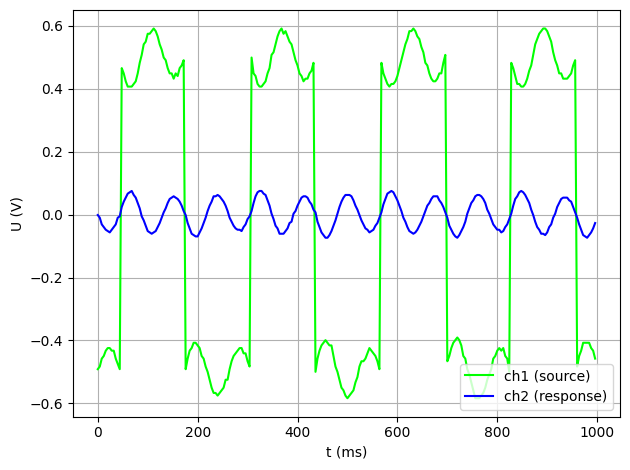

In [53]:
oscyl = osci(time,ch1,ch2)
makeOscPlot(oscyl,"ms")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


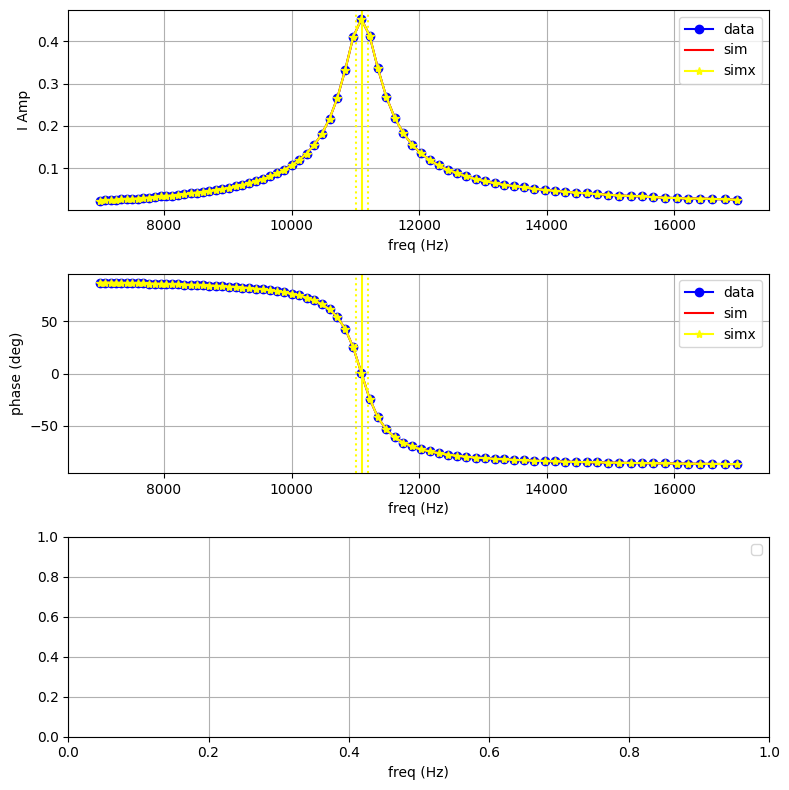

In [106]:
body = bode(freq,gain,phase,"data","#0000ff",marker="o")
body2 = bode(freq,gain,phase,"sim","#ff0000")
body3 = bode(freq,gain,phase,"simx","#ffff00",marker="*",f=11100,q=120.23)
makePhasePlot([body,body2,body3],"I Amp")